#### Simple Neural Network in Keras
* Source blog: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
* Source data: https://www.kaggle.com/iabhishekofficial/mobile-price-classification (both training & test csv files)

##### Step 1:Preprocess and load data: 
Data is the key for the working of neural network and we need to process it before feeding to the neural network. Also visualize data which will help us to gain insight into the data.

##### Step 2: Define model:
Next define neural network model. That is specify the number of hidden layers in the neural network and their size, the input and output size.

##### Step 3: Loss and optimizer:
Next define the loss function according to our task. We also need to specify the optimizer to use with learning rate and other hyperparameters of the optimizer.

##### Step 4: Fit model:
This is the training step of the neural network. Here we need to define the number of epochs for which we need to train the neural network.

##### Step 5: Test model:
Now test it on test data to check if it is overfitting. We can save weights of the model and use it later whenever required.

In [1]:
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd

#dataset import
dataset = pd.read_csv('mobiletrain.csv')
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [3]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

##### Building Neural Network
Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.
In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.

In [9]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

ModuleNotFoundError: No module named 'tensorflow'

In our neural network, we are using two hidden layers of 16 and 12 dimension.

* Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.
* model.add is used to add a layer to our neural network. We need to specify as an argument what type of layer we want. 
* The Dense is used to specify the fully connected layer. The arguments of Dense are output dimension which is 16 in the first case, input dimension which is 20 for input dimension and the activation function to be used which is relu in this case. 
* The second layer is similar, we dont need to specify input dimension as we have defined the model to be sequential so keras will automatically consider input dimension to be same as the output of last layer i.e 16. 
* In the third layer(output layer) the output dimension is 4(number of classes). 
* The output layer takes different activation functions and for the case of multiclass classification, it is softmax.

Specify the loss function and the optimizer. It is done using compile function in keras.

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Here loss is cross entropy loss as discussed earlier. Categorical_crossentropy specifies that we have multiple classes. The optimizer is Adam. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

We are done with building a neural network and we will train it.

Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

Now we have started the training of our neural network. Accuracy achieved is 99.33% as can be seen below in the 100th epoch.

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1800/1800 [==============================] - 1s 337us/step - loss: 1.4522 - accuracy: 0.2283
Epoch 2/100
1800/1800 [==============================] - 0s 26us/step - loss: 1.3956 - accuracy: 0.2644
Epoch 3/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.3549 - accuracy: 0.3122
Epoch 4/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.3156 - accuracy: 0.3450
Epoch 5/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.2705 - accuracy: 0.3950
Epoch 6/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.2172 - accuracy: 0.4350
Epoch 7/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.1543 - accuracy: 0.4772
Epoch 8/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.0800 - accuracy: 0.5183
Epoch 9/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.9996 - accuracy: 0.5556
Epoch 10/100
1800/1800 [==============================] - 0s 23

1800/1800 [==============================] - 0s 18us/step - loss: 0.0610 - accuracy: 0.9894
Epoch 80/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0586 - accuracy: 0.9906
Epoch 81/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0581 - accuracy: 0.9889
Epoch 82/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0570 - accuracy: 0.9906
Epoch 83/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0584 - accuracy: 0.9894
Epoch 84/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0553 - accuracy: 0.9906
Epoch 85/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0538 - accuracy: 0.9911
Epoch 86/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0523 - accuracy: 0.9917
Epoch 87/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0512 - accuracy: 0.9933
Epoch 88/100
1800/1800 [==============================] - 0s 17us/st

In [24]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

This step is inverse one hot encoding process. We will get integer labels using this step. We can predict on test data using a simple method of keras, model.predict(). It will take the test data as input and will return the prediction outputs as softmax.

In [25]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 91.0


Training Accuracy is 91% - quite good!!

In [26]:
# USing test data to validate
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 63us/step - loss: 0.0400 - accuracy: 0.9944 - val_loss: 0.2353 - val_accuracy: 0.9200
Epoch 2/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0393 - accuracy: 0.9961 - val_loss: 0.2358 - val_accuracy: 0.9200
Epoch 3/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0384 - accuracy: 0.9978 - val_loss: 0.2403 - val_accuracy: 0.9050
Epoch 4/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0384 - accuracy: 0.9967 - val_loss: 0.2368 - val_accuracy: 0.9100
Epoch 5/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0380 - accuracy: 0.9950 - val_loss: 0.2385 - val_accuracy: 0.9200
Epoch 6/100
1800/1800 [==============================] - 0s 19us/step - loss: 0.0368 - accuracy: 0.9961 - val_loss: 0.2437 - val_accuracy: 0.9050
Epoch 7/100
1800/1800 [==============================] - 0s 21us/step - loss:

Now we will visualize training and validation losses and accuracies.

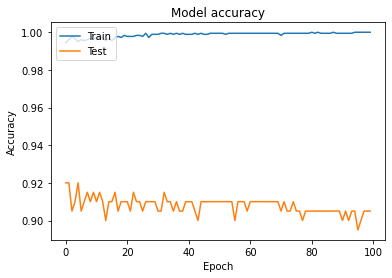

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

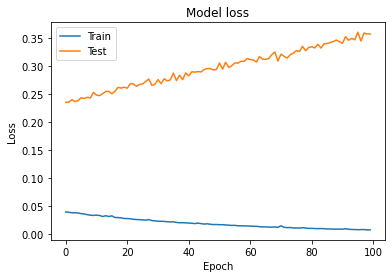

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()